In [ ]:
#!pip install pandas_profiling 

In [ ]:
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sw_df = pd.read_csv('/content/drive/MyDrive/proyecto/smartwatch.csv')
sw_df.head(10)

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
5,6,0,11.64,0.54,23,48,0,NaN,1,27042,7513,NaN,3,0,0
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
7,8,0,12.70,0.41,48,20,0,NaN,0,29781,26749,134.0,2,0,0
8,9,0,10.88,0.68,72,44,0,NaN,0,814,9607,99.0,3,0,0
9,10,1,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0


In [ ]:
# ProfileReport(sw_df)

### LIMPIEZA DE DATOS

In [ ]:
sw_df = sw_df.drop(columns=['Patient_Number', 
                      'salt_content_in_the_diet', 
                      'Genetic_Pedigree_Coefficient'])

In [ ]:
sw_df.isnull().sum()

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [ ]:
# los NaN de Pregnancy hay que cambiarlos por ceros y lo mismo con 
# los de alcohol_consumption_per_day
sw_df['Pregnancy'] = sw_df['Pregnancy'].fillna(0)
sw_df['alcohol_consumption_per_day'] = sw_df['alcohol_consumption_per_day'].fillna(0)
sw_df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,34,23,1,1.0,0,45961,0.0,2,1,1
1,0,9.75,54,33,1,0.0,0,26106,205.0,3,0,0
2,1,10.79,70,49,0,0.0,0,9995,67.0,2,1,0
3,0,11.00,71,50,0,0.0,0,10635,242.0,1,1,0
4,1,14.17,52,19,0,0.0,0,15619,397.0,2,0,0


In [ ]:
# fusionamos las columnas Chronic_kidney_disease y Adrenal_and_thyroid_disorders
# en una única columna como comorbilidades
sw_df['comorbility'] = sw_df[['Chronic_kidney_disease', 
                        'Adrenal_and_thyroid_disorders']].agg(np.max, axis=1) 


In [ ]:
sw_df = sw_df.drop(columns=['Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'])

In [ ]:
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Blood_Pressure_Abnormality   2000 non-null   int64  
 1   Level_of_Hemoglobin          2000 non-null   float64
 2   Age                          2000 non-null   int64  
 3   BMI                          2000 non-null   int64  
 4   Sex                          2000 non-null   int64  
 5   Pregnancy                    2000 non-null   float64
 6   Smoking                      2000 non-null   int64  
 7   Physical_activity            2000 non-null   int64  
 8   alcohol_consumption_per_day  2000 non-null   float64
 9   Level_of_Stress              2000 non-null   int64  
 10  comorbility                  2000 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 172.0 KB


In [ ]:
# Blood_Pressure_Abnormality, Sex, Pregnancy, Smoking, Level_of_Stress y 
# comorbility son categoricas. Todas tienen que ser formato int
sw_df['Pregnancy'] = sw_df['Pregnancy'].astype('int')

In [ ]:
sw_df.columns = ['pressure_status', 'hemoglobin', 'age', 'bmi', 'sex', 'pregnant',
              'smoking', 'steps', 'alcohol', 'stress', 'comorbility']

In [ ]:
sw_df.head()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility
0,1,11.28,34,23,1,1,0,45961,0.0,2,1
1,0,9.75,54,33,1,0,0,26106,205.0,3,0
2,1,10.79,70,49,0,0,0,9995,67.0,2,1
3,0,11.00,71,50,0,0,0,10635,242.0,1,1
4,1,14.17,52,19,0,0,0,15619,397.0,2,0


In [ ]:
path = '/content/drive/MyDrive/proyecto/clean_smartwatch.csv'
# df.to_csv(path, index=False, sep=';', decimal=',')

In [ ]:
ecg_df = pd.read_csv('/content/drive/MyDrive/proyecto/clean_ecg_data.csv')
ecg_df.tail()

,target,pre-RR,post-RR,pPeak,tPeak,rPeak,sPeak,qPeak,qrs_interval,pq_interval,qt_interval,st_interval,qrs_morph0,qrs_morph1,qrs_morph2,qrs_morph3,qrs_morph4
418246,N,76.0,148.0,-0.345439,1.086720,-0.213846,-0.213846,-0.699650,24.0,11.0,41.0,6.0,-0.699650,-0.682007,-0.629330,-0.511539,-0.443134
418247,N,148.0,104.0,0.095040,0.804837,0.211167,0.211167,0.008211,4.0,25.0,34.0,5.0,0.008211,0.008211,0.020658,0.052953,0.113674
418248,N,32.0,22.0,1.603278,-0.518048,-0.531231,-0.531231,-1.296207,16.0,14.0,31.0,1.0,-1.296207,-1.141306,-0.987177,-0.867459,-0.703928
418249,N,56.0,82.0,-0.942216,-1.074539,-0.955163,-1.249941,-0.955163,7.0,2.0,16.0,7.0,-0.955163,-0.980976,-1.022301,-1.136976,-1.193036
418250,N,60.0,64.0,1.085070,-0.027911,0.284400,-0.402152,0.284400,70.0,36.0,154.0,48.0,0.284400,0.108676,-0.013296,-0.088642,-0.264585


In [ ]:
ecg_df = ecg_df[['target', 'pre-RR']].rename(columns={'target':'beat', 'pre-RR':'RR'})
ecg_df = ecg_df.iloc[1:].reset_index(drop=True)
ecg_df.head()

,beat,RR
0,N,194.0
1,N,188.0
2,N,194.0
3,N,198.0
4,N,196.0


In [ ]:
group_size = 16
ecg_df['patient'] = (ecg_df.index/group_size).astype('int')
ecg_df.head(16) 

,beat,RR,patient
0,N,194.0,0
1,N,188.0,0
2,N,194.0,0
3,N,198.0,0
4,N,196.0,0
5,N,196.0,0
6,N,206.0,0
7,N,200.0,0
8,N,196.0,0
9,N,190.0,0


In [ ]:
# agrupamos por paciente
def count_veb(x):

  return np.count_nonzero(x == 'VEB')

ecg_df = ecg_df.groupby(by='patient').agg({'beat':count_veb, 'RR':np.mean})
ecg_df.head()

,beat,RR
patient,,
0,0,193.500
1,1,186.500
2,0,182.875
3,0,197.625
4,0,194.625


In [ ]:
ecg_df['beat'].value_counts()

0     19864
1      3618
2      1082
3       457
4       267
8       211
5       202
6       152
7       108
9        39
10       31
13       29
12       20
16       18
14       15
11       15
15       13
Name: beat, dtype: int64

In [ ]:
# con numero de latidos > 10
more_than_ten = ecg_df[ecg_df['beat'] > 10]
less_than_two = ecg_df[ecg_df['beat'] < 2]
rest = ecg_df[(ecg_df['beat'] > 2) & (ecg_df['beat'] < 6)]

In [ ]:
# cogemos los 110 de "more_than_ten" --> a
# cogemos 700 de "rest" --> b
# cogemos 1190 de "more_than_ten" --> c

In [ ]:
import random 

random.seed(0)
b_idxs = random.sample(range(1, len(rest)), 700)
random.seed(1)
c_idxs = random.sample(range(1, len(less_than_two)), 1190)


a_df = more_than_ten
b_df = rest.iloc[b_idxs]
c_df = less_than_two.iloc[c_idxs]

In [ ]:
ecg_vars_df = pd.concat([a_df, b_df, c_df], ignore_index=True)
random.seed(2)
ecg_vars_df = ecg_vars_df.sample(frac=1, random_state=2).reset_index(drop=True)
ecg_vars_df.head()

,beat,RR
0,3,229.250
1,3,203.000
2,1,237.500
3,5,189.625
4,0,273.750


In [ ]:
# concatenamos las variables del smartwatch con las del ecg
df = pd.concat([sw_df, ecg_vars_df], axis=1)
df.head()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility,beat,RR
0,1,11.28,34,23,1,1,0,45961,0.0,2,1,3,229.250
1,0,9.75,54,33,1,0,0,26106,205.0,3,0,3,203.000
2,1,10.79,70,49,0,0,0,9995,67.0,2,1,1,237.500
3,0,11.00,71,50,0,0,0,10635,242.0,1,1,5,189.625
4,1,14.17,52,19,0,0,0,15619,397.0,2,0,0,273.750


In [ ]:
cat_vars=['pressure_status','sex', 'pregnant', 'smoking', 'stress', 'comorbility']
num_vars=['hemoglobin','age', 'bmi', 'steps', 'alcohol', 'beat', 'RR']

### Numerical variables

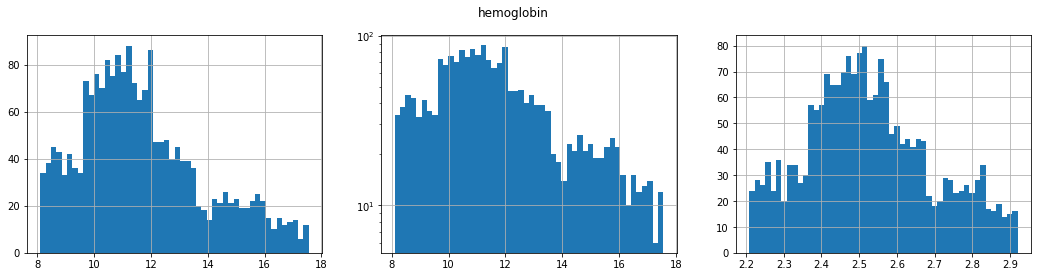

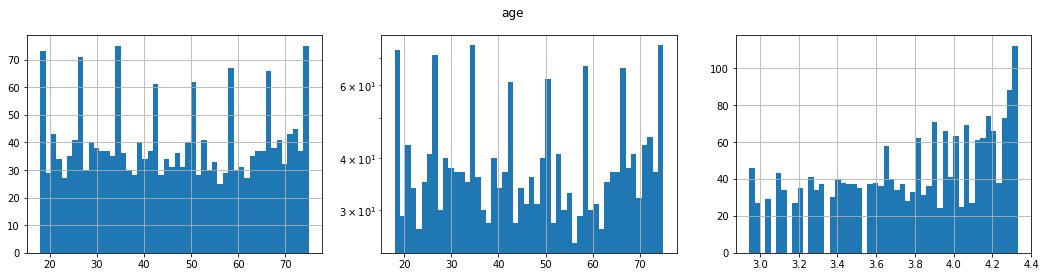

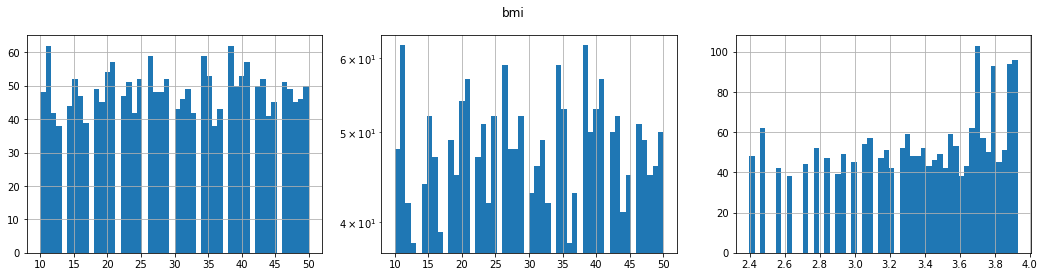

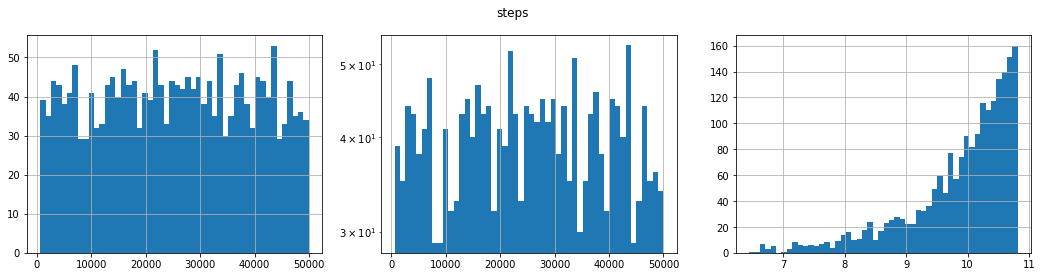

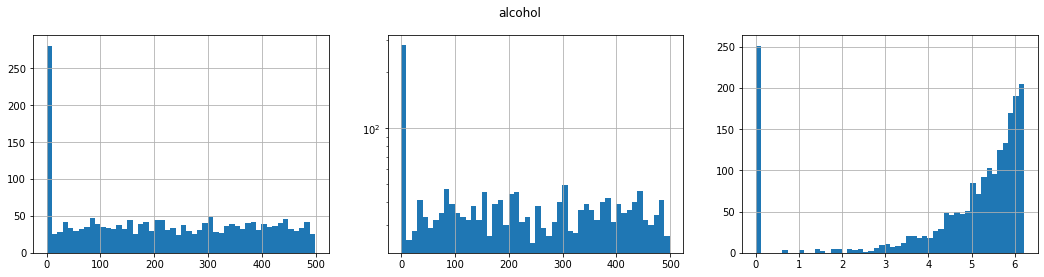

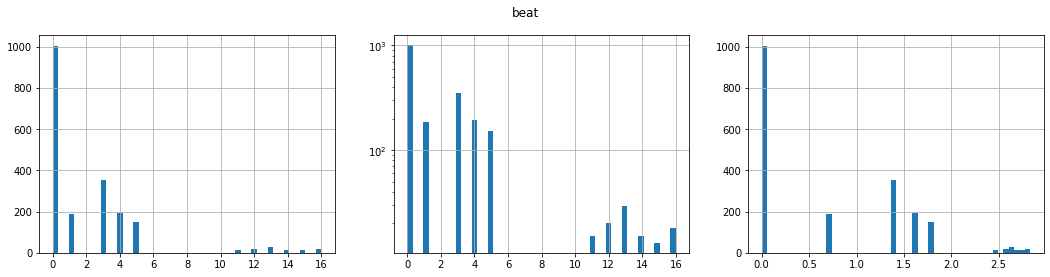

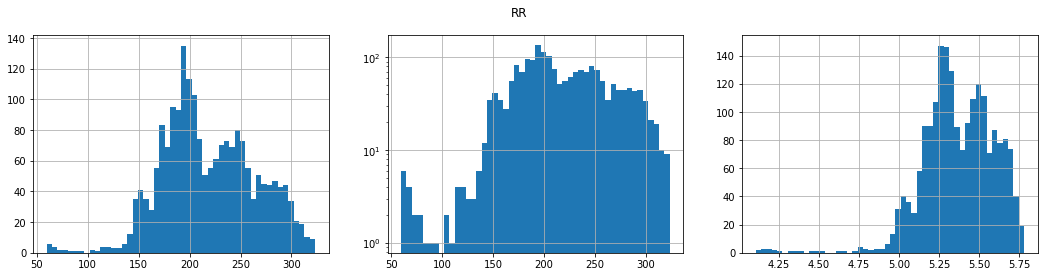

In [ ]:
%matplotlib inline 
for var in num_vars:
    #display(df[var].describe())
    fig, ax = plt.subplots(1,3,figsize=(18,4))
    df[var].hist(bins=50, ax=ax[0])
    df[var].hist(bins=50, log=True, ax=ax[1])
    np.log(df[var]+1).hist(bins=50,ax=ax[2])
    plt.suptitle(var)

,hemoglobin,age,bmi,steps,alcohol,beat,RR
hemoglobin,1.000000,-0.159202,0.101631,-0.037111,-0.049717,-0.006043,0.029056
age,-0.159202,1.000000,0.029165,0.026434,0.328581,-0.034316,0.010393
bmi,0.101631,0.029165,1.000000,-0.004571,-0.030317,-0.028009,0.021991
steps,-0.037111,0.026434,-0.004571,1.000000,-0.010824,0.034447,0.019568
alcohol,-0.049717,0.328581,-0.030317,-0.010824,1.000000,-0.020700,-0.043764
beat,-0.006043,-0.034316,-0.028009,0.034447,-0.020700,1.000000,-0.387123
RR,0.029056,0.010393,0.021991,0.019568,-0.043764,-0.387123,1.000000


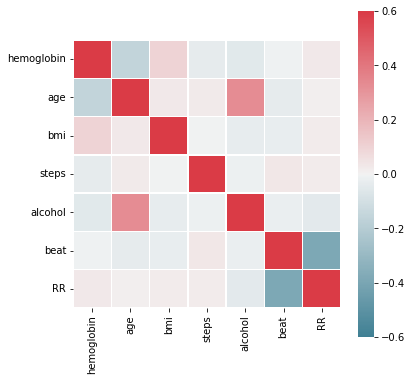

In [ ]:
import seaborn as sns
corr = df[num_vars].corr(method='spearman') # Pearson (linear), Spearman (non linear)
#corr = df[['RR', 'beat']].corr(method='pearson')
f, ax = plt.subplots(figsize=(6, 6)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=0.6, vmin=-0.6, square=True, linewidths=.5)
corr

In [ ]:
# no hay correlación entre las variables

## Clustering


#### ECG Clustering

In [ ]:
# columnas que vamos a usar
# bmi, comorbility, stress, smoking, alcohol
cols = ['RR', 'beat']

In [ ]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.pipeline import Pipeline

clustering_data = df[cols].copy()
original_data = df.copy()

In [ ]:
# consigues distribucion gaussiana
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
normal_cols = pipeline.fit_transform(clustering_data)
n_df = pd.DataFrame(normal_cols, columns=clustering_data.columns)

for var in clustering_data.columns:
  fig, ax = plt.subplots(1,3,figsize=(15,6))
  df[var].hist(bins=30, ax=ax[0])
  n_df[var].hist(bins=30, ax=ax[1])
  np.log(df[var]+1).hist(bins=30, ax=ax[2])

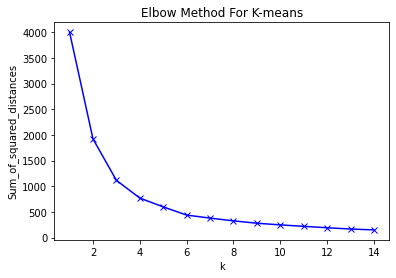

In [ ]:
from sklearn.cluster import KMeans
distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=1) 
    km = km.fit(n_df)
    distances.append(km.inertia_)
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For K-means')
plt.show()

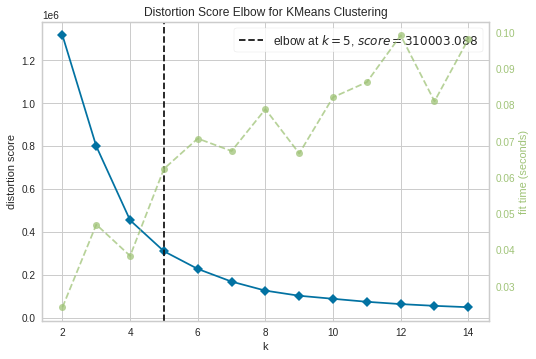

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 15))
visu.fit(clustering_data)
visu.show()

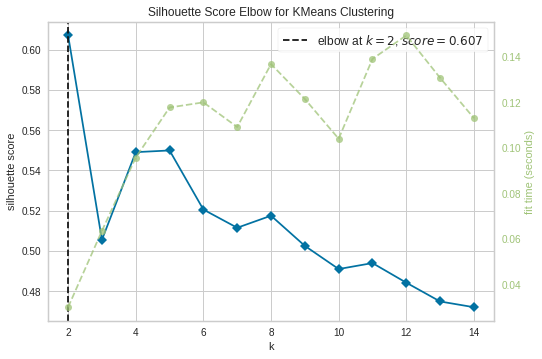

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 15), metric='silhouette')
visu.fit(clustering_data)
visu.show()

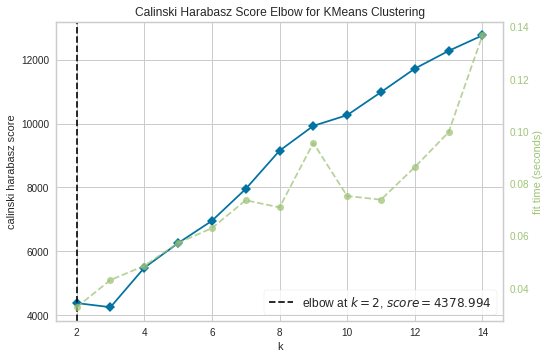

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 15), metric='calinski_harabasz')
visu.fit(clustering_data)
visu.show()

In [ ]:
n_clusters = 5

# Create the clustering algorithm
clustering = KMeans(n_clusters = n_clusters, random_state=666)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data) # hago prediccion

# añades una columna 'cluster' que indique 'cluster1', 'cluster2' o 'cluster3'
clustering_data['cluster'] = pd.Series((clustering.labels_ + 1).astype(str)) 
original_data['cluster'] = pd.Series((clustering.labels_ + 1).astype(str))

clustering_data['cluster'].value_counts()

1    660
5    532
4    396
2    381
3     31
Name: cluster, dtype: int64

In [ ]:
from scipy import stats

# Fix the number of cuts selected per feature
selected_cuts = 100

def color_explanation(cut, factor=1):
    palette = sns.color_palette("ch:start=.2,rot=-.3", selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

mean_data = original_data.groupby('cluster').mean() # agrupas por cluster y sacas la media
feature_explanation = pd.DataFrame() # preparas un df para ir agregando cols

# Translate to the selected number of cuts
for feature in mean_data.columns:  # para cada columna
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data[feature] # cojo los datos originales de cada variable/col
    for cluster in mean_data.index:  # para cada cluster           
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster]) # calculo el percentil
        cut = np.ceil((percentile / 100) * selected_cuts) # calculo el percentil de la media para ese cluster con
                                                          # respecto al resto de datos (con esto veré las veces que
                                                          # la gente de un cluster busca un tema (Religión) con 
                                                          # respecto a las veces que busca otro tema(Sports))
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,1,2,3,4,5
RR,39.000000,91.000000,1.000000,10.000000,68.000000
age,51.000000,51.000000,35.000000,51.000000,52.000000
alcohol,53.000000,50.000000,54.000000,53.000000,51.000000
beat,60.000000,51.000000,100.000000,78.000000,60.000000
bmi,49.000000,51.000000,54.000000,51.000000,51.000000
comorbility,31.000000,31.000000,31.000000,31.000000,31.000000
hemoglobin,58.000000,62.000000,58.000000,55.000000,56.000000
pregnant,91.000000,91.000000,91.000000,91.000000,91.000000
pressure_status,51.000000,51.000000,51.000000,51.000000,51.000000
sex,51.000000,51.000000,51.000000,51.000000,51.000000


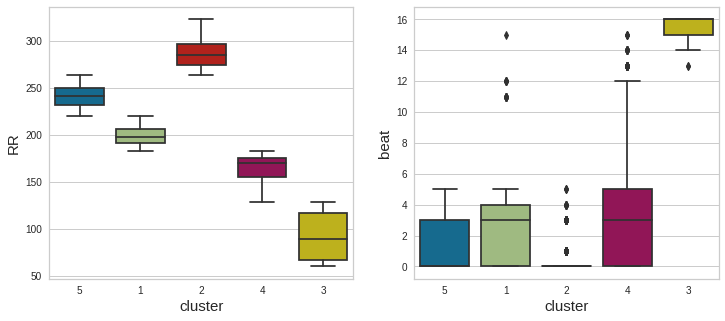

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
for i,col in enumerate(original_data[cols][:3]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()

El cluster 3 esta formado por personas con un RR bajo (taquicardia) y con 14-16 latidos anómalos de los últimos 16. Tomaremos a este grupo como el grupo de riesgo. Para el resto de grupos vamos a hacer un nuevo clustering sin considerar las variables del ECG, solo tomaremos las del smartwatch.

In [ ]:
clustering_data['cluster'].unique()

array(['5', '1', '2', '4', '3'], dtype=object)

In [ ]:
# grupo de riesgo
df_risk = original_data[original_data['cluster'] == '3'] \
              .reset_index(drop=True)
df_risk.head()          

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility,beat,RR,cluster
0,0,11.40,70,46,1,0,1,39948,418.0,1,0,16,116.625,3
1,1,8.26,55,11,1,0,1,5404,327.0,1,1,16,60.875,3
2,0,9.75,26,18,1,0,1,31477,135.0,2,0,16,61.875,3
3,1,13.48,56,46,0,0,1,49926,304.0,3,1,15,92.125,3
4,0,12.19,39,13,0,0,1,25357,41.0,2,0,15,121.250,3


In [ ]:
# grupo no riesgo
df_no_risk = original_data[original_data['cluster'] != '3'] \
              .drop(columns=['RR', 'beat','cluster']) \
              .reset_index(drop=True)

# df que vamos a usar para la union final
df_no_risk_concat = original_data[original_data['cluster'] != '3'] \
                  .drop(columns=['cluster']) \
                  .reset_index(drop=True)

In [ ]:
df_no_risk.tail()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility
1964,1,10.14,69,26,1,0,1,26118,144.0,3,1
1965,1,11.77,24,45,1,1,1,2572,0.0,3,1
1966,1,16.91,18,42,0,0,0,14933,0.0,2,1
1967,0,11.15,46,45,1,0,1,18157,253.0,3,1
1968,1,11.36,41,45,0,0,0,20729,230.0,1,1


### Smartwatch clustering

In [ ]:
clustering_data_2 = df_no_risk.copy()
original_data_2 = df_no_risk.copy()

In [ ]:
original_data_2.tail()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility
1964,1,10.14,69,26,1,0,1,26118,144.0,3,1
1965,1,11.77,24,45,1,1,1,2572,0.0,3,1
1966,1,16.91,18,42,0,0,0,14933,0.0,2,1
1967,0,11.15,46,45,1,0,1,18157,253.0,3,1
1968,1,11.36,41,45,0,0,0,20729,230.0,1,1


In [ ]:
# consigues distribucion gaussiana
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
normal_cols = pipeline.fit_transform(clustering_data_2)
n_df = pd.DataFrame(normal_cols, columns=clustering_data_2.columns)

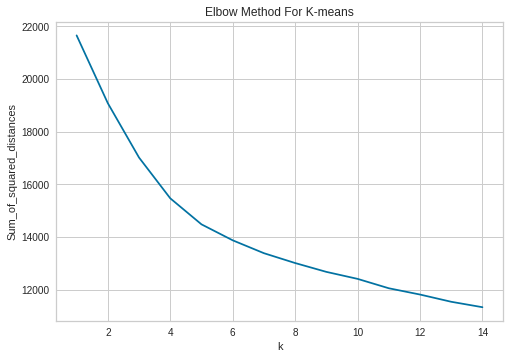

In [ ]:
from sklearn.cluster import KMeans
distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=1) 
    km = km.fit(n_df)
    distances.append(km.inertia_)
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For K-means')
plt.show()

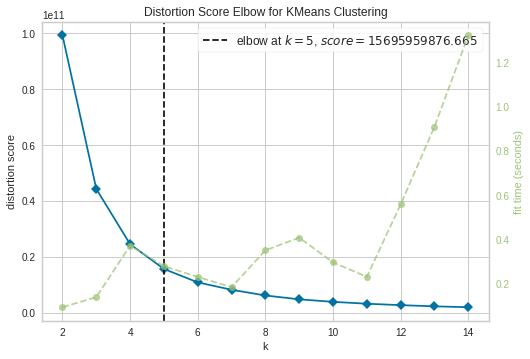

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 15))
visu.fit(clustering_data_2)
visu.show()

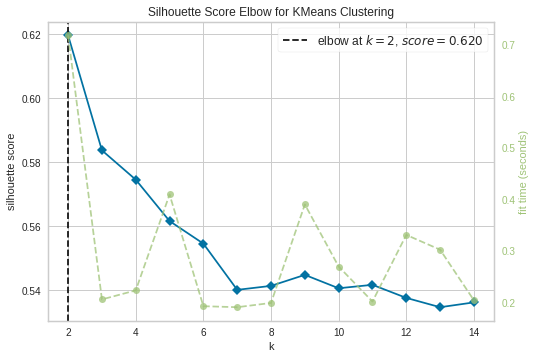

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 15), metric='silhouette')
visu.fit(clustering_data_2)
visu.show()

/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


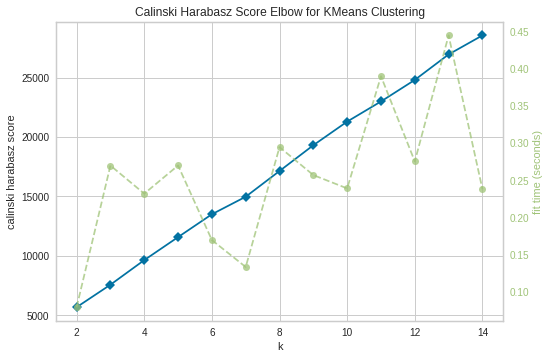

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 15), metric='calinski_harabasz')
visu.fit(clustering_data_2)
visu.show()

In [ ]:
n_clusters = 5

# Create the clustering algorithm
clustering = KMeans(n_clusters = n_clusters, random_state=666)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data_2) # hago prediccion

# añades una columna 'cluster' que indique 'cluster1', 'cluster2' o 'cluster3'
clustering_data_2['cluster'] = pd.Series((clustering.labels_ + 1).astype(str)) 
original_data_2['cluster'] = pd.Series((clustering.labels_ + 1).astype(str))

clustering_data_2['cluster'].value_counts()

3    409
2    402
1    398
4    381
5    379
Name: cluster, dtype: int64

In [ ]:
from scipy import stats

# Fix the number of cuts selected per feature
selected_cuts = 100

def color_explanation(cut, factor=1):
    palette = sns.color_palette("ch:start=.2,rot=-.3", selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

mean_data = original_data_2.groupby('cluster').mean() # agrupas por cluster y sacas la media
feature_explanation = pd.DataFrame() # preparas un df para ir agregando cols

# Translate to the selected number of cuts
for feature in mean_data.columns:  # para cada columna
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data_2[feature] # cojo los datos originales de cada variable/col
    for cluster in mean_data.index:  # para cada cluster           
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster]) # calculo el percentil
        cut = np.ceil((percentile / 100) * selected_cuts) # calculo el percentil de la media para ese cluster con
                                                          # respecto al resto de datos (con esto veré las veces que
                                                          # la gente de un cluster busca un tema (Religión) con 
                                                          # respecto a las veces que busca otro tema(Sports))
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,1,2,3,4,5
age,56.000000,59.000000,31.000000,56.000000,56.000000
alcohol,32.000000,71.000000,15.000000,91.000000,52.000000
bmi,54.000000,49.000000,52.000000,49.000000,52.000000
comorbility,31.000000,31.000000,31.000000,31.000000,31.000000
hemoglobin,56.000000,54.000000,63.000000,57.000000,58.000000
pregnant,91.000000,91.000000,91.000000,91.000000,91.000000
pressure_status,51.000000,51.000000,51.000000,51.000000,51.000000
sex,51.000000,51.000000,51.000000,51.000000,51.000000
smoking,50.000000,50.000000,50.000000,50.000000,50.000000
stress,66.000000,66.000000,66.000000,66.000000,34.000000


In [ ]:
cols = original_data_2.drop(columns='cluster').columns
cols

Index(['pressure_status', 'hemoglobin', 'age', 'bmi', 'sex', 'pregnant',
       'smoking', 'alcohol', 'stress', 'comorbility'],
      dtype='object')

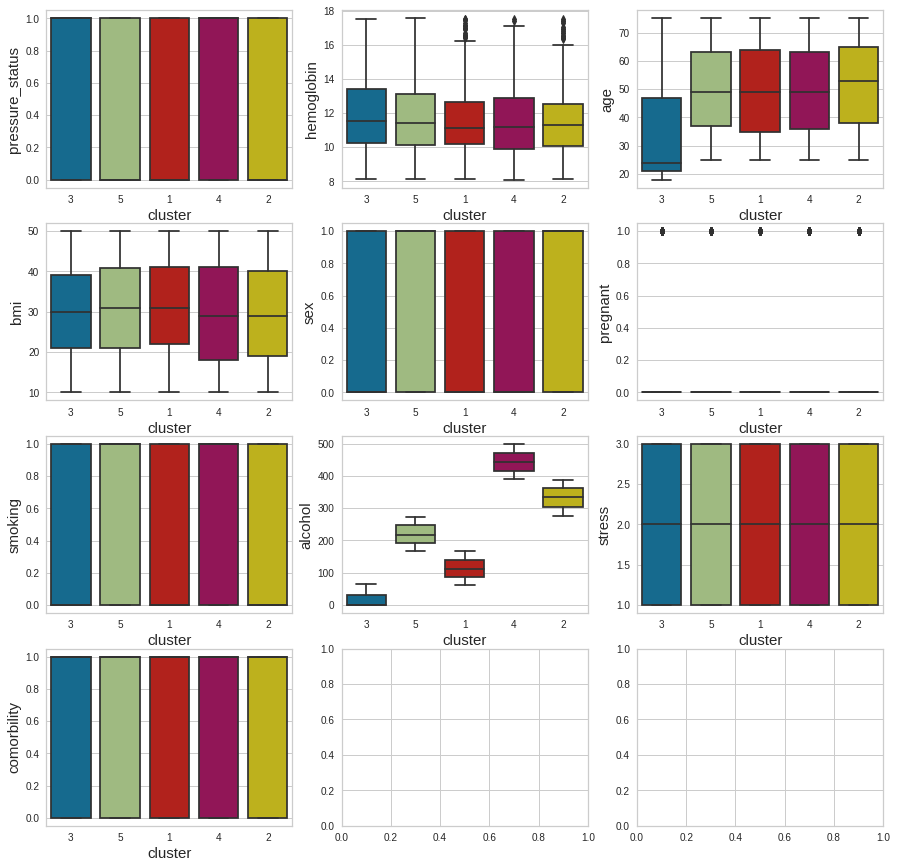

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(15,15))
ax = ax.flatten()
for i,col in enumerate(original_data_2[cols]):
    sns.boxplot(x="cluster", y=col, data=original_data_2, ax=ax[i])   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()

#### Iteración sobre varios conjuntos de variables

In [ ]:
original_data_2.head()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,alcohol,stress,comorbility,cluster
0,1,11.28,34,23,1,1,0,0.0,2,1,3
1,0,9.75,54,33,1,0,0,205.0,3,0,5
2,1,10.79,70,49,0,0,0,67.0,2,1,1
3,0,11.00,71,50,0,0,0,242.0,1,1,5
4,1,14.17,52,19,0,0,0,397.0,2,0,4


,pressure_status,sex,pregnant,smoking,stress,comorbility
pressure_status,1.000000,0.055292,0.013725,0.012867,0.007524,0.425017
sex,0.055292,1.000000,0.334689,0.000612,0.006244,0.012219
pregnant,0.013725,0.334689,1.000000,-0.076491,0.004551,0.001576
smoking,0.012867,0.000612,-0.076491,1.000000,-0.024860,0.002651
stress,0.007524,0.006244,0.004551,-0.024860,1.000000,0.000614
comorbility,0.425017,0.012219,0.001576,0.002651,0.000614,1.000000


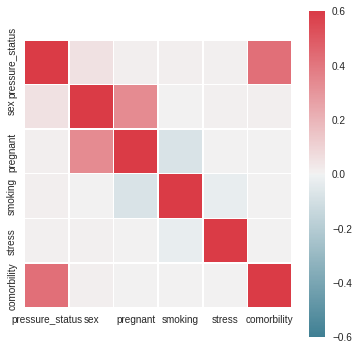

In [ ]:
import seaborn as sns
num_vars = ['hemoglobin','age', 'bmi', 'steps', 'alcohol']
corr = original_data_2[cat_vars].corr(method='pearson') # Pearson (linear), Spearman (non linear)
#corr = df[['RR', 'beat']].corr(method='pearson')
f, ax = plt.subplots(figsize=(6, 6)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=0.6, vmin=-0.6, square=True, linewidths=.5)
corr

In [ ]:
import itertools
pd.options.mode.chained_assignment = None

n_clusters = 2
var_combinations = []
n_df_no_preg = n_df.drop(columns=['pregnant', 'sex'])
cols = n_df_no_preg.columns
# for L in range(0, len(cols)+1):
k = 0
for L in range(3, 5):
    for subset in itertools.combinations(cols, L):
      subset = list(subset)
      if len(subset) == 1 or len(subset) == 0:
        continue
      
      temp_df = pd.DataFrame()
      temp_df = n_df_no_preg.copy()
      temp_df = temp_df[subset]
      ori_temp_df = original_data_2[subset]

      # Create the clustering algorithm
      clustering = KMeans(n_clusters = n_clusters, random_state=666)

      # Fit the clustering
      cluster_labels = clustering.fit_predict(temp_df) # hago prediccion

      # añades una columna 'cluster' que indique 'cluster1', 'cluster2' o 'cluster3'
      temp_df['cluster'] = pd.Series((clustering.labels_ + 1).astype(str)) 
      ori_temp_df['cluster'] = pd.Series((clustering.labels_ + 1).astype(str))

      # print
      num_cols = temp_df[subset].columns

      fig, ax = plt.subplots(3,3,figsize=(15,15))
      ax = ax.flatten()
      for i,col in enumerate(ori_temp_df[num_cols]):
        sns.boxplot(x="cluster", y=col, data=ori_temp_df, ax=ax[i])   
        ax[i].set_xlabel('cluster',fontsize=15)
        ax[i].set_ylabel(col,fontsize=15)
      fig.savefig("/content/drive/MyDrive/proyecto/plots/" + str(k) + '_2.png') 
      plt.close()
      k += 1
    print(L)

3
4


#### K-means con hemoglobina, BMI, alcohol, edad

In [ ]:
cols = ['hemoglobin','age', 'bmi', 'alcohol']
clustering_data_3 = df_no_risk[cols].copy()
original_data_3 = df_no_risk[cols].copy()

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
normal_cols = pipeline.fit_transform(clustering_data_3)
n_df = pd.DataFrame(normal_cols, columns=clustering_data_3.columns)

In [ ]:
n_clusters = 2

# Create the clustering algorithm
clustering = KMeans(n_clusters = n_clusters, random_state=666)

# Fit the clustering
cluster_labels = clustering.fit_predict(n_df) # hago prediccion

# añades una columna 'cluster' que indique 'cluster1', 'cluster2' o 'cluster3'
clustering_data_3['cluster'] = pd.Series((clustering.labels_ + 1).astype(str)) 
original_data_3['cluster'] = pd.Series((clustering.labels_ + 1).astype(str))

clustering_data_3['cluster'].value_counts()

1    1186
2     783
Name: cluster, dtype: int64

In [ ]:
from scipy import stats

# Fix the number of cuts selected per feature
selected_cuts = 100

def color_explanation(cut, factor=1):
    palette = sns.color_palette("ch:start=.2,rot=-.3", selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

mean_data = original_data_3.groupby('cluster').mean() # agrupas por cluster y sacas la media
feature_explanation = pd.DataFrame() # preparas un df para ir agregando cols

# Translate to the selected number of cuts
for feature in mean_data.columns:  # para cada columna
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data_3[feature] # cojo los datos originales de cada variable/col
    for cluster in mean_data.index:  # para cada cluster           
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster]) # calculo el percentil
        cut = np.ceil((percentile / 100) * selected_cuts) # calculo el percentil de la media para ese cluster con
                                                          # respecto al resto de datos (con esto veré las veces que
                                                          # la gente de un cluster busca un tema (Religión) con 
                                                          # respecto a las veces que busca otro tema(Sports))
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,1,2
age,65.000000,27.000000
alcohol,65.000000,30.000000
bmi,47.000000,54.000000
hemoglobin,46.000000,72.000000


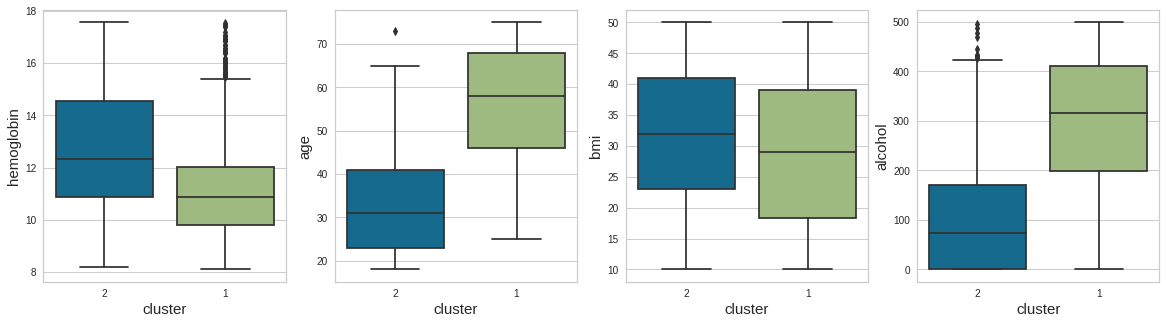

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax = ax.flatten()
for i,col in enumerate(original_data_3[cols]):
    sns.boxplot(x="cluster", y=col, data=original_data_3, ax=ax[i])   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()

In [ ]:
original_data_3.head()

,hemoglobin,age,bmi,alcohol,cluster
0,11.28,34,23,0.0,2
1,9.75,54,33,205.0,1
2,10.79,70,49,67.0,1
3,11.00,71,50,242.0,1
4,14.17,52,19,397.0,1


In [ ]:
df_no_risk_concat.head()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility,beat,RR
0,1,11.28,34,23,1,1,0,45961,0.0,2,1,3,229.250
1,0,9.75,54,33,1,0,0,26106,205.0,3,0,3,203.000
2,1,10.79,70,49,0,0,0,9995,67.0,2,1,1,237.500
3,0,11.00,71,50,0,0,0,10635,242.0,1,1,5,189.625
4,1,14.17,52,19,0,0,0,15619,397.0,2,0,0,273.750


In [ ]:
# añadimos las etiquetas del clustering al df con todas las variables
df_no_risk_concat['cluster'] = original_data_3['cluster']
df_no_risk_concat.head()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility,beat,RR,cluster
0,1,11.28,34,23,1,1,0,45961,0.0,2,1,3,229.250,2
1,0,9.75,54,33,1,0,0,26106,205.0,3,0,3,203.000,1
2,1,10.79,70,49,0,0,0,9995,67.0,2,1,1,237.500,1
3,0,11.00,71,50,0,0,0,10635,242.0,1,1,5,189.625,1
4,1,14.17,52,19,0,0,0,15619,397.0,2,0,0,273.750,1


In [ ]:
# añadimos el grupo de riesgo
final_df = pd.concat([df_no_risk_concat, df_risk], ignore_index=True)
final_df.head()

,pressure_status,hemoglobin,age,bmi,sex,pregnant,smoking,steps,alcohol,stress,comorbility,beat,RR,cluster
0,1,11.28,34,23,1,1,0,45961,0.0,2,1,3,229.250,2
1,0,9.75,54,33,1,0,0,26106,205.0,3,0,3,203.000,1
2,1,10.79,70,49,0,0,0,9995,67.0,2,1,1,237.500,1
3,0,11.00,71,50,0,0,0,10635,242.0,1,1,5,189.625,1
4,1,14.17,52,19,0,0,0,15619,397.0,2,0,0,273.750,1


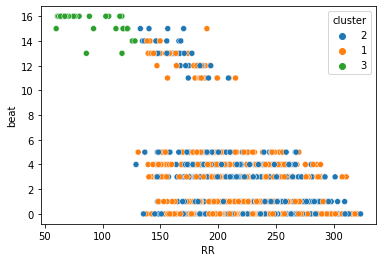

In [ ]:
# grupo de riesgo
% matplotlib inline
sns.scatterplot(x='RR', y='beat', hue='cluster', data=final_df)

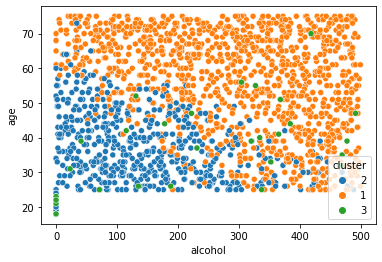

In [ ]:
# grupo de riesgo
sns.scatterplot(x='alcohol', y='age', hue='cluster', data=final_df)

In [ ]:
final_df.to_csv('/content/drive/MyDrive/proyecto/clean_smartwatch.csv', sep=';', \
                index=False, decimal=',')